THE IMDB DATASET

The IMDB dataset is a set of 50,000 highly polarised reviews from the internet Movie Database.
The dataset itself is partitioned into 25,000 reviews for training and 25,000 reviews for testing. Within each partition set there is a 50-50 balance between positive and negative reviews.

Classyfiying movie reviews as positive or negative can be seen as an example of A Binary Classification problem or Two class classification. Binary Classification is the general task of separating a dataset based on classification of two groups on the basis of a certain classification rule. Binary Classification is a type of supervised learning, the positive and negative classes are predefined and the dataset set used in training is already labelled with the correct annotation or class by an expert annotator.

IMDB dataset is packaged in Keras.
The reviews, which are sequence of words have been pre-processed into sequence of integers, where each integer stands for a specific word in a dictionary.
The words in the reviewed are indexed by overall frequency in the dataset, so that for instance the number '3' encodes the 3rd most frequent word in the data.
'0' is used to encode any unknown word.

We start off by importing the IMDB dataset from the Keras package that is installed on our machine

We load the dataset into two tuples.
The first tuple contains dataset we will utilise for training of our model 'train_label' and 'train_data'
'train_data' contains a list of sequences where each sequence is a list of indices that encode a sequence of word.
'train_label' contains a list of integer labels that are either 1 or 0
The second tuple 'test_label' and 'test_data' contains 1 and 0

The imdb dataset has the function load data that takes several parameeters (https://keras.io/datasets/)
We are only utilising the 'num_word' parameter which is set to 10,000. The parameter value of 10,000 means that only the top 10,000 words are used within the dataset.

In [9]:
#import tensorflow as tf
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Before we proceed onto building our Model and training it, we first have to preprocess the data we will be training and testing our model with.
Data Preprocessing is a common practice and it is taken to ensure the dataset we have adheres to the input type of the neural networks of our model.
A neural network takes the data structure of a tensor with floating-points, in some cases you can have tensors of integers.

Tranforming your data into tensor is known as Data Vectorization. Esentially we need to turn the sequences of words, represented by indices in a list and use 'one-hot' encoding to turn them into a tensor of float32 data (the default datatype in np is float64 set to float32 to save some space and compactability).

'One-Hot Encoding' is the process of taking our dataset with categories and tranforming the categories into some form of binary representation. So for example the word sequence [3,5] would be transformed into a 10,000 dimensional vector that would be all 0s except for the values in indices 3 and 5.

We create a class called 'vecorize_sequence' to achieve the process of data vectorisation.
We create an 10,000D tensor of zeros with the numpy function 'np.zeros'
The length of the sequence represent the number of axis in our tensor and the dimension on each axis is set to 10000

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')


After all the pre-requisite setup we have gone through, we can now proceed to building our network.

We begin by importing the models and layers class (IS IT RIGHT TO CALL THEM CLASSES) from the keras module.

Models is a functional API that enables the initialisation and definition of the network we are composing.
Model comes with a bunch of methods that descibes the stuctural composition of the network.
For this task we are currently utilising the 'Sequential' method for deifning the structural composition.

The sequential is a linear stack of layers, this means that each layers are stacked one after the other, layer-by-layer.
In a sequential model, the layers shares input from the layer before it and provide outputs directly to the layer after.

(TALK ABOUT THE ALTERNATIVE TO SEQUENTIAL, WHICH IS FUNCTIONAL)
(WRITE A SEPERATE MEDIUM ARTICLE ON SEQUENTIAL MODEL https://keras.io/getting-started/sequential-model-guide/)
(WRITE A SEPERATE MEDIUM ARTICLE ON FUNCTIONAL MODEL)

We begin by calling the Sequential constructor from the models API.
Thereafter we can the add method from the sequential class we instantiated.
The add method takes in parameters that define the layers within the network.

One key information to note is that the first layer within your network needs to be provided with information on what input shape is to be expected, other layers after the first layer do not need a definition of the input shape as the layers can perform automatic shape inference.

To begin we create our first layer my calling the 'model.add()' method, in which we pass parameters that define the type of layer.
The definition of the layer is created by calling the layers.Dense() method. 
We are creating a dense layer which means that each nueron within the layers recieves input from all the neurons on the previous layer. 
The 'layers.dense()' method takes in parameters that defines the number of units, type of activation function and the input shape that is expected, remember the input shape is only defined for the first layer.

The numbers of units in our first layer will be 16 (you can consider units to be a synomyns for neurons in ths case), therefore in the first two layers we have 16 neurons within a layer. 
In the last layer we define a layer with just 1 unit. 

// Talk about what the number of units implies
A hidden unit is a dimension in the representation space of the layer.
Having hidden 16 units menas that the weight matrix will have shape (input_dimensions, 16)
The dot product with W and the input will project the data onto a 16-dimensional representation space, then the bias is added and the relu applicaiton is included.
The dimensonaity of the represenation space is how much freedom you are enabling the entwork to have whgen leerning internal rerpeseentation, so having a higeher dimensional repreesenation makes the network to learn more expensive representations, but it can make the network more computationaliy expensive and can lead to the learning of unwanted patterns
The key architecture deision to be made about such stack of Dense layers are the following:
- How many layers to use
- How many hidden units to choose for each layer

The last layer witth our network will output the scalar prediction rgarding the sentiment of the current review.
The final layer will use a sigmoid activation as to output a probability, which is a score between 1 and 0, to have the score of 1 is how likey the review is to be positive.

The inclusion of a activation function such as relu (rectified linear unit) increases the represenational power of the network.
Without the relu activation function the dense layer would consit of linear opperations, a dot product and an addition:

output = dot(W, input) + b

The layer can only learn linear transformations (affine transformation) from the input data.
The hypothesis space will be restricted, as it would be the set of all possible transformation from the input data in a 16 dimensional space.
In order to incerase and acess a richer hypthesis space, we require deep representaion that is obtained via non-linearity or an activation function.

Relu is simply an operation that transforms negative input values to zero and positive input value retain their actual value.
(UNDERSTAND WHY THIS ACTUALLY WORKS< WHY DOES RELU WORK)



In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now that we have defined our model structure, layers and units, we can move onto the configuration of the model for training.

The model class has a method called compile that takes in everal parameters that defined the congiguration and behaviour of the model during training.

One of the paramaters of the compile method is the definition of an optimizer. An optimizer updates the weight parameters in order to redce the loss or cost function. (INCLUDE SOME MORE INFO ON OPTIMISERS). We will be utilising rmsprop.

Another parameter is the loss function to be utilised during training. The loss function guides the gradient to a local minimum. The loss function we will be utilising is 'binary_crossentropy' (RESEARCH SOME MORE ON LOSS FUNCTIONS). Cross entropy is usually the best choice when dealing with models that output probabilities.
The cross entropy measures the distance between tthe probablity distribution of the ground truth and the prediction made by our model.

In [12]:
from keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


We will create a validation set from our traning data, we will set apart 10,000 training examples from the training data.
The purpose of doing this is to measure the accuracy of our model on unseen data during training

In [13]:
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In order to train our model we make use of the fit method from the model class we have instantiatied.
The fit method takes in parameters such as the dataset to train on, the number of epochs, batch size and the validation data to utilise during training.

model.fit() returns an history object that contains a memeber called history (dictionary) that contains information on what occured during traininig.

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


W0709 17:24:49.962975  8924 deprecation_wrapper.py:119] From C:\Users\Richmond\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 321us/step - loss: 0.4975 - binary_accuracy: 0.7953 - val_loss: 0.3715 - val_binary_accuracy: 0.8727
Epoch 2/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.2957 - binary_accuracy: 0.9046 - val_loss: 0.2990 - val_binary_accuracy: 0.8908
Epoch 3/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.2160 - binary_accuracy: 0.9284 - val_loss: 0.3086 - val_binary_accuracy: 0.8715
Epoch 4/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.1742 - binary_accuracy: 0.9435 - val_loss: 0.2831 - val_binary_accuracy: 0.8838
Epoch 5/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1415 - binary_accuracy: 0.9541 - val_loss: 0.2863 - val_binary_accuracy: 0.8852
Epoch 6/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1143 - binary_accuracy: 0.9653 - val_loss: 0.3095 - val_bi

<IPython.core.display.Javascript object>


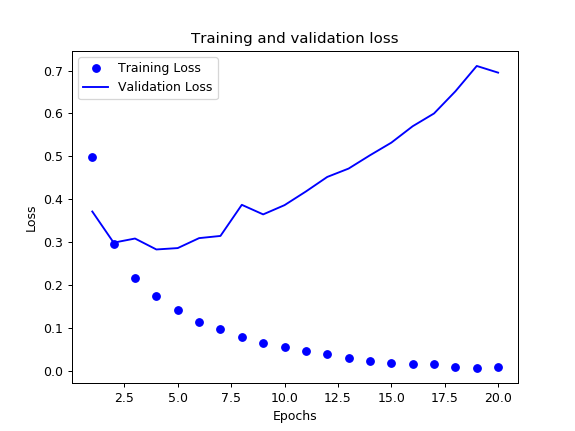

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


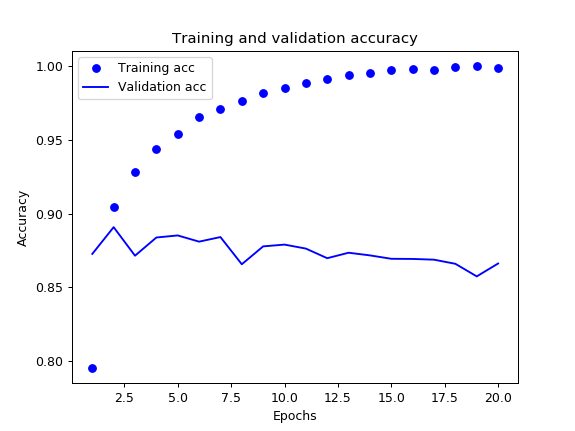

In [27]:
plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
model.predict(x_test)

array([[0.01467353],
       [0.9999999 ],
       [0.9415773 ],
       ...,
       [0.00165552],
       [0.00784847],
       [0.7239944 ]], dtype=float32)